## MGOC15 - Introductory Business Data Analytics

# Data Assignment 2 (6 Points)

**Topics Tested:** Data Merging, Filtering & Boolean Operations, Groupby <br>
You may work in teams of two (or individually) but you must each submit your assignment separately and also mention your partner's name so that your work does not seem plagiarized.


### Hospital Bed Analysis

One of the critical issues during the COVID-19 pandemic was the management of hospital beds across Canada. In this question, you will perform the first-step analysis in better understanding the different types of beds and how they are distributed in Canada.

The two files <i>hospital_data_final.csv</i> and <i>icu_data.csv</i> have the overall and ICU bed information in Canada (up to early 2020), as provided directly by the <b>Canadian Institute for Health Information</b>. Since the ICU beds are typically managed by a different department in the hospital (emergency administration), there is a different dataset for this.


The column information is as follows:

1. <i>Province:</i> The province of the hospital.
2. <i>Health region:</i> The health region in the province the hospital is associated with. Each province has its own regional divisions.
3. <i>Hospital:</i> The hospital name.
4. <i>Type of hospital:</i> A string of letters associated with each hospital, where:<br>
    4.1. <b>G:</b> General<br>
    4.2. <b>S-Ped</b>: Specialty — Pediatric<br>
    4.3. <b>C</b>: Cancer Treatment<br>
    4.4. <b>S-Psy</b>: Specialty — Psychiatric<br>
    4.5. <b>S-Oth</b>: Specialty — Other<br>
    4.6. <b>R</b>: Rehabilitation<br>
    4.7. <b>E</b>: Extended Care/Chronic<br>
    4.8. <b>n/a</b>: No data was available.<br>
5. <i>Remaining columns:</i> Number of beds of each type. Empty indicates the hospital has no beds of that specialty.

In the <i>icu_data.csv</i>, the columns are the hospital name and the number of ICU beds. Note that the list of hospitals in the two datasets may not match perfectly --- this is because some of the hospitals in <i>hospital_data_final.csv</i> do not contain ICU beds and their names are not present in the ICU dataset.

Answer the following managerial questions below to draw important insights on how beds are distributed in Canada. The answer to every single question must contain an explanation - simply writing the code will not suffice. The explanation can be written as a comment or a markdown cell.

<b> Note: </b> Before answering the questions, please go to to the Jupyter's menu and execute "Kernel", "Restart & Run all." This will ensure that the notebook and modules are appropriately loaded. 

<i> This assignment is worth 6 points</i>

### Loading Python modules

We start by first importing packages and modules needed for our analysis

In [122]:
import pandas as pd               # for data manipulation
import numpy as np                # for stats and numerical analysis
import matplotlib.pyplot as plt   # for plotting and data visualization



### Retrieving data

Let us begin by reading and understanding the two datasets

In [2]:
# Read the hospital_data_final.csv file below
dfRest = pd.read_csv('hospital_data_final.csv')

# Read the icu_data.csv file below
dfICU = pd.read_csv('icu_data.csv')

In [6]:
#Display the head of the two files below
print(dfRest.head())
print(dfICU.head())

  Province      Health region                      Hospital Type of hospital  \
0       ON  Central East LHIN    Scarborough Health Network                G   
1       ON       Central LHIN         Humber River Hospital                G   
2       ON       Central LHIN              Mackenzie Health                G   
3       ON       Central LHIN  Markham Stouffville Hospital                G   
4       ON       Central LHIN   North York General Hospital                G   

  Teaching status  Obstetrics  Pediatrics  Mental Health and Addictions  \
0    Non-Teaching          50          26                            92   
1    Non-Teaching          25          14                            64   
2    Non-Teaching          14           6                            25   
3    Non-Teaching          29           5                            33   
4    Non-Teaching          28          12                            50   

   Rehabilitation  Long-Term Care  Other Acute  
0              20  

In [5]:
#Print the ICU Dataset First Five Rows
print(dfICU.head())

                       Hospital  Intensive Care
0    Scarborough Health Network              62
1         Humber River Hospital              41
2              Mackenzie Health              30
3  Markham Stouffville Hospital              10
4   North York General Hospital              21


In [9]:
#Check the length of the two files below:    
print(len(dfRest),len(dfICU))

628 205


In [20]:
print("The length of dfRest means the total number of hospitals in different provinces in the file, and the length of dfIC-U means\
 the number of hospitals which have ICU.")

The length of dfRest means the total number of hospitals in different provinces in the file, and the length of dfIC-U means the number of hospitals which have ICU.


Before merging, think about what the number of rows printed above implies.

### Question 1: [1 point]

Merge the two dataframes dfRest and dfICU into a new dataframe called dfHospital below. It is important to identify the right type of merge. Remember, some hospitals do not have any ICU beds and therefore their names are present in the dfRest dataframe but not in dfICU. However, the merged dataframe must contain these hospitals.

In [21]:
#Answer Q1
dfHospital = pd.merge(dfRest, dfICU, on='Hospital', how = 'outer')

In [25]:
#Don't forget to run this code after merging. When there is a missing value, this will fill it with 0.
#We will discuss this in detail in a later lecture.
dfHospital = dfHospital.fillna(0)

### Question 2: [1.5 point] - Slicing and Counting

Answer the following questions to get a better understanding of our dataset.

a) Display/Print the total number of hospitals in each province of our dataset.

b) After displaying the numbers in part a, use a pie chart to visualize the same information. Do you think a pie chart is the appropriate tool for this visualization. Why/Why not?

c) What is the average number of ICU beds (per hospital) across all hospitals in Canada?

    Hint: Remember, each row in our dataset represents a unique hospital.

In [27]:
#Answer Q2a
dfgrouped = dfHospital.groupby("Province")
print(dfgrouped['Hospital'].count())

Province
AB    108
BC     99
MB     72
NB     25
NL     34
NS     37
NT      4
ON    142
PE      7
QC     35
SK     62
YT      3
Name: Hospital, dtype: int64


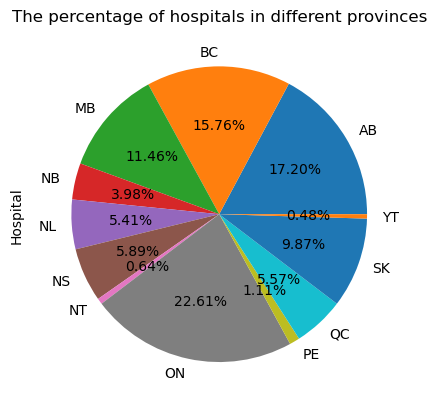

In [34]:
#Answer Q2b
num_Hos = dfgrouped['Hospital'].count()
num_Hos.plot(kind = 'pie',autopct='%0.2f%%')
plt.title("The percentage of hospitals in different provinces")
plt.show()

Text(0.5, 1.0, 'The percentage of hospitals in different provinces')

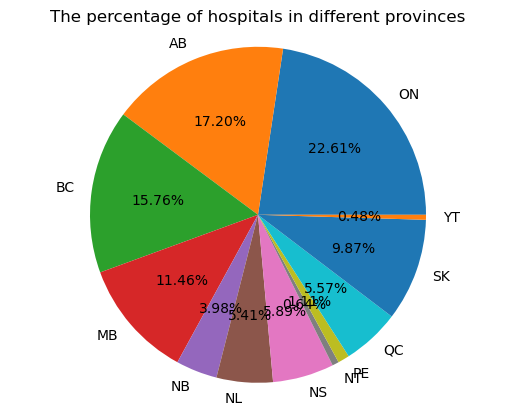

In [75]:
province = {}
for i in dfHospital['Province'].unique():
    count = len(dfHospital[dfHospital['Province'] == i])
    province[i] = count
provinces = list(province.keys())
counts = list(province.values())
plt.pie(counts, labels=provinces, autopct = '%0.2f%%')
plt.axis('equal')
plt.title("The percentage of hospitals in different provinces")

In [76]:
#Answer Q2c
dfHospital["Intensive Care"].mean()

7.20859872611465

### Question 3 (1 points)

Ontario and Quebec are the most populated provinces in Canada. Their populations are approximately 14.5 million and 8.5 million respectively. However, it is often claimed that the per-capita number of ICU beds in Quebec (QC in the dataset) is much larger than the same number for Ontario. 

Do you believe that this is accurate? Analyze the dataset to support your answer.

In [ ]:
#Answer Q3

In [89]:
count_ON = dfHospital[dfHospital['Province'] == "ON"]['Intensive Care'].sum()
count_QC = dfHospital[dfHospital['Province'] == "QC"]['Intensive Care'].sum()
print('The ICU bed per-capita is', round(count_ON/14.5E6,6), 'in Ontario')
print('The ICU bed per-capita is', round(count_ON/8.5E6,6), 'in Quebec')

The ICU bed per-capita is 0.000121 in Ontario
The ICU bed per-capita is 0.000206 in Quebec


Analysis: 
Based on my calculation, the bed per-capita in Quebec is more than in Ontario

### Question 4 (1 points)

Recently there is a big concern that Canadian hospitals are overflowing with sick children and there aren't enough beds. With this in mind, calculate:

a) The total number of pediatric beds in each Canadian province<br>
b) The average number of pediatric beds *per hospital* in each province. 

In [97]:
#a)
count_pedia_bed = dfHospital.groupby('Province')['Pediatrics'].sum()
print(count_pedia_bed)

Province
AB    163
BC    132
MB     15
NB     81
NL     15
NS      8
NT     10
ON    502
PE     19
QC    700
SK    105
YT      0
Name: Pediatrics, dtype: int64


In [99]:
#b)
avg_pedia_bed = round(dfHospital.groupby('Province')['Pediatrics'].mean(),2)
print(avg_pedia_bed)

Province
AB     1.51
BC     1.33
MB     0.21
NB     3.24
NL     0.44
NS     0.22
NT     2.50
ON     3.54
PE     2.71
QC    20.00
SK     1.69
YT     0.00
Name: Pediatrics, dtype: float64


### Question 5 (1 points)

In this question we will start to understand the correlation between ICU beds and obstetrics beds in hospitals. First, create a new dataframe called dfBest that contains only the information from those hospitals with at least 15 ICU Beds. Now calculate the average number of obstetrics beds for the hospitals in dfBest.

How does this number compare to the overall average number of obstetrics beds. What does tell you about the correlation between these two variables?

In [119]:
dfBest = dfHospital[dfHospital['Intensive Care'] >= 15]
dfBest['Obstetrics'].mean()

32.72826086956522

In [120]:
dfHospital['Obstetrics'].mean()

6.952229299363057

In [128]:
df_correlation = dfBest['Obstetrics'].corr(dfHospital['Obstetrics'])
print("The correlation for the two variables:", df_correlation)

The correlation for the two variables: 0.9999999999999999


Since the filtered variable is the subset of overall variable, the correlation should be approximately 1. 

### Question 6 [0.5 points]

**Explanation only**: When you merge two dataframes df1 and df2, is it possible that the resulting (merged) dataframe has fewer rows than one of the two dataframes (either df1 or df2)? Is it possible that the resulting (merged) dataframe has fewer columns?

Answer yes/no to both questions along with one line explanation.

Yes, it is possible that the resulting dataframe has fewer rows since the inner merge only presents the identical values in both dataframes. (interaction)

No, all the types of merge will not change the structure of columes